# Ford GoBike System Data
## by Kola Ademola

## Investigation Overview

> For the presentaion I'll like to focus on how age affects the number of trips and even the number of people that subscribe to the Bike share program. I'll start by introducing the age variable and then show how it is distributed accross the dataset.

> After which I introduce how the diffrent age groups come out on:  
   > * The number of trips taken using a simple bar chart
   > * The proportion of Subscribers to Customers using a simple pie chart
   > * The number of subscribers compared to customers for each age group using a simple clustered bar chart for easy comparison.
   > * The trend of trips taken over the month using a line plot.  

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe

bike_clean = pd.read_csv('bike_clean.csv')

#view dataset
bike_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_group,trip_day,trip_month,trip_time,trip_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984-01-01 00:00:00.000,Male,No,35,31 - 50yrs,Thursday,February,05PM,Week 5
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,1988-01-01 00:00:00.000,Male,No,31,31 - 50yrs,Thursday,February,06PM,Week 5
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972-01-01 00:00:00.000,Male,No,47,31 - 50yrs,Thursday,February,12PM,Week 5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989-01-01 00:00:00.000,Other,No,30,31 - 50yrs,Thursday,February,05PM,Week 5
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974-01-01 00:00:00.000,Male,Yes,45,31 - 50yrs,Thursday,February,11PM,Week 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183210,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,324,Union Square (Powell St at Post St),4832,Subscriber,1996-01-01 00:00:00.000,Male,No,23,18 - 30yrs,Friday,February,12AM,Week 1
183211,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),66,3rd St at Townsend St,4960,Subscriber,1984-01-01 00:00:00.000,Male,No,35,31 - 50yrs,Friday,February,12AM,Week 1
183212,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,277,Morrison Ave at Julian St,3824,Subscriber,1990-01-01 00:00:00.000,Male,Yes,29,18 - 30yrs,Friday,February,12AM,Week 1
183213,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,5095,Subscriber,1988-01-01 00:00:00.000,Male,No,31,31 - 50yrs,Friday,February,12AM,Week 1


## Distribution of User Age
> The age of users takes on a range of **18 years as the youngest user** to the **oldest as 141 years old** and it's distribution is skewed to the right taking on a unimodal shape.  
From the chart we can see how most users fall in between **20 - 50yrs**

In [7]:
#age distribution chart

def viz1():
    color = 'mediumslateblue'
    min_age = bike_clean['age'].min()
    max_age = bike_clean['age'].max()
    bins = np.arange(min_age, max_age + 5, 5)
    bike_clean['age'].plot.hist(bins = bins, color = color, figsize = (15, 10))
    plt.xlabel('Age')
    plt.title('Age Distribution')

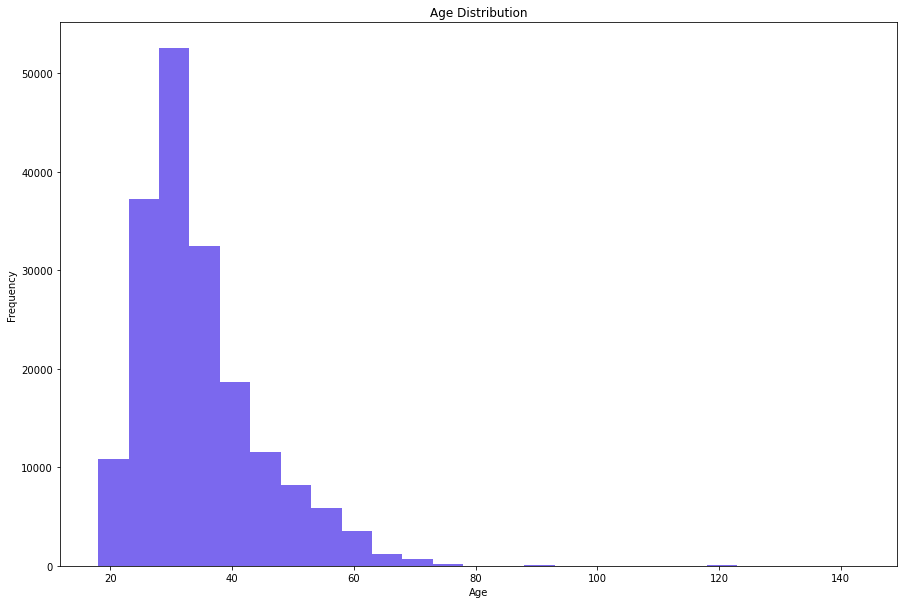

In [8]:
viz1()

## Number of Trips by Age Group

> Plotting the count of trips for each age group shows clearly that most of the users are in the **18 - 30yrs** & **31 - 50yrs** bucket or in general like we saw in the age distribution **20 - 50yrs** is indeed correct..

In [11]:
#bar chart of count of trips by age group

def viz2():
    color = 'mediumslateblue'
    sns.catplot(data = bike_clean, x = 'age_group', kind = 'count', color = color, height = 5.5, aspect = 2.5)
    plt.title('Trips Taken by Age Group')
    plt.ylabel('Count of Trips')
    plt.xlabel('Age Groups')
    plt.xticks(rotation = 60)

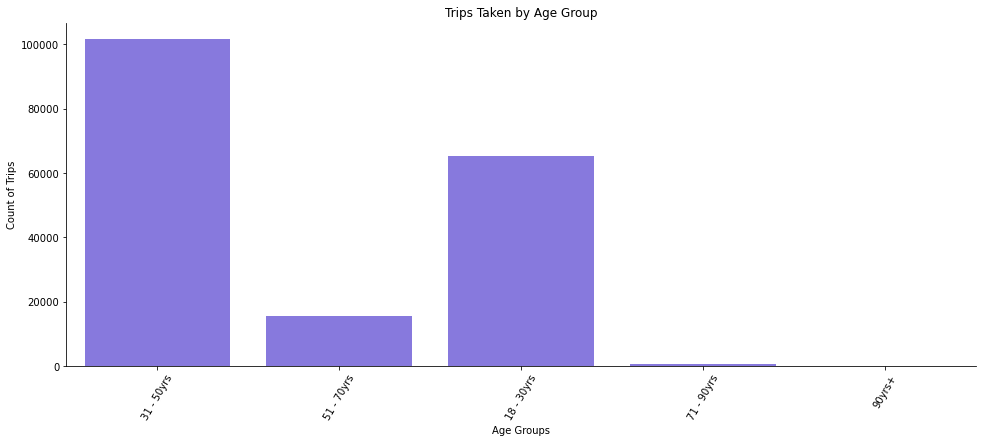

In [12]:
viz2()

## Proportion of Subscribers to Customers

> Using a Pie Chart to show that **89%** of trips are taken by **Subscribers**

In [13]:
#pie chart showing the proportion of subscribers

def viz3():
    
    explode = [0.1, 0]
    color = 'mediumslateblue'
    colors = [color, 'orange']

    bike_clean['user_type'].value_counts().plot.pie(explode = explode, colors = colors, figsize = (15, 10), autopct='%.0f%%')
    plt.title('Proportion of Subscribers to Customers')
    plt.ylabel('')

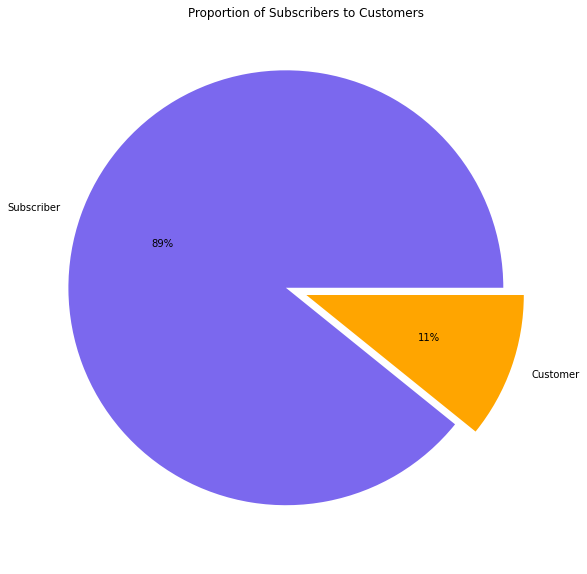

In [14]:
viz3()

## Further look into the Proportion of Subscribers by Age Group

> I'll be using a Clustered bar chart to emphasize further on how most Subscribers that take the most trips are people between **18 - 50 years old**

In [15]:
#create a subset of the data

age_sub = bike_clean.groupby(['age_group', 'user_type']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False)
age_sub

,age_group,user_type,counts
3,31 - 50yrs,Subscriber,89260
1,18 - 30yrs,Subscriber,59246
5,51 - 70yrs,Subscriber,14262
2,31 - 50yrs,Customer,12388
0,18 - 30yrs,Customer,6054
4,51 - 70yrs,Customer,1331
7,71 - 90yrs,Subscriber,575
9,90yrs+,Subscriber,71
6,71 - 90yrs,Customer,22
8,90yrs+,Customer,6


In [17]:
#bar chart for subscriber count for each age_group

def viz4():
    color = 'mediumslateblue'
    colors = [color, 'orange']
    sns.catplot(data = age_sub, x = 'age_group', y = 'counts', hue = 'user_type', kind = 'bar', height = 5.5, aspect = 2.5, palette = colors)
    plt.title('Number of Trips Taken by Subscribers & Age Group')
    plt.ylabel('Count of Trips')
    plt.xlabel('Age Groups')
    plt.xticks(rotation = 60);

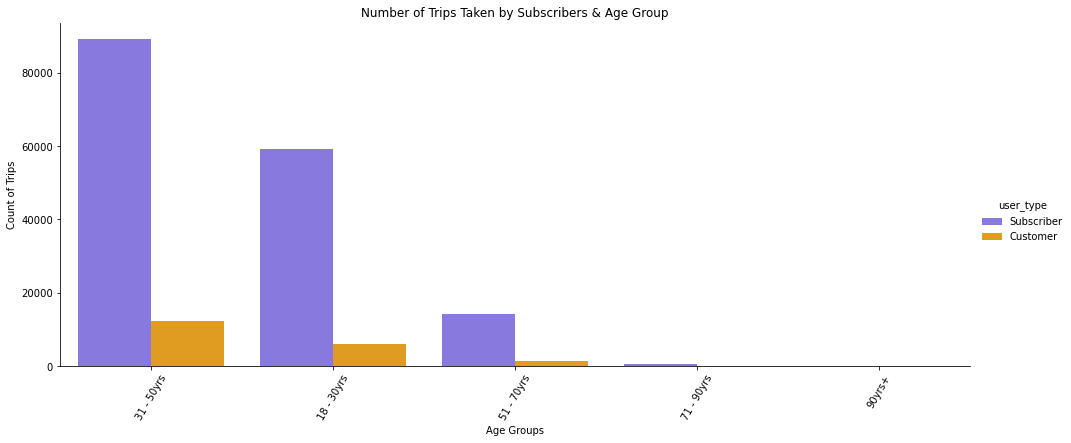

In [18]:
viz4()

## Trend of Trips Over the weeks

> Using a Line plot we can see how the number of trips starts **declining** after the **3rd week** of the month

In [19]:
#create a subset of data

trend = bike_clean.groupby('trip_week').size().reset_index(name = 'trip_count')
trend

,trip_week,trip_count
0,Week 1,35225
1,Week 2,42583
2,Week 3,46832
3,Week 4,48754
4,Week 5,9821


In [20]:
#line plot of trips

def viz5():
    color = 'mediumslateblue'
    plt.figure(figsize = (15, 5))
    sns.lineplot(data = trend, x = 'trip_week', y = 'trip_count', ci = None, color = color)
    plt.title('Trend of Trips over time')
    plt.xlabel('Weeks')
    plt.ylabel('Count of Trips');

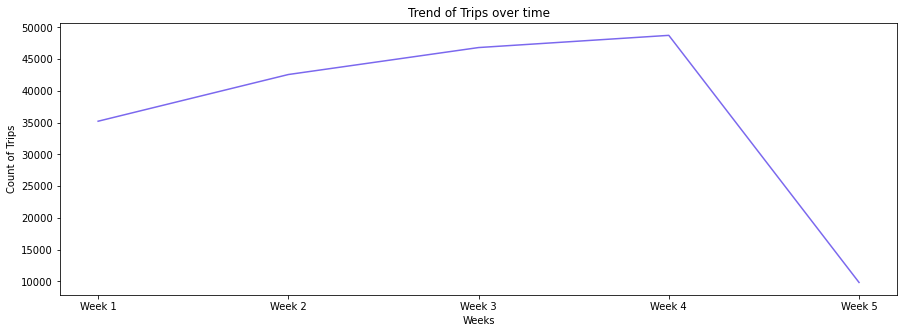

In [22]:
viz5()

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve